In [1]:
import pandas as pd
import numpy as np
from lab4 import *
import matplotlib.pyplot as plt

file_1 = "dunaj.prn"
file_2 = "opady.prn"

df1 = load_prn(file_1)
df2 = load_prn(file_2)

629
629


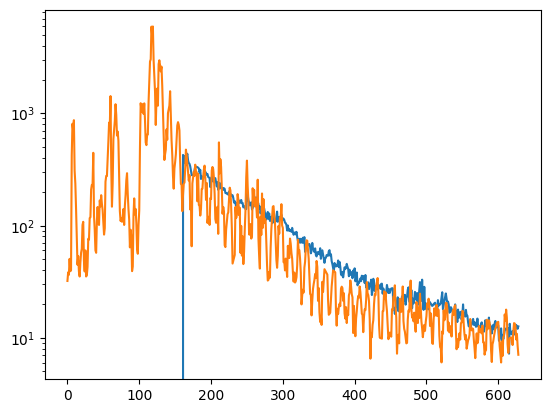

In [2]:
print(len(df1[1]))
print(len(df2[1]))

plt.yscale("log")
plt.plot(df1[1])
plt.plot(df2[1])

In [20]:
lamb = np.log(2)/(12.33 * 12) #years - half time of tritum decay
print(f"Lambda: {lamb}")

def g(x):

    #return piston_flow(x, t_t = 0)
    return exp_model(x, t_t = 130)
    #return disp_model(x, t_t=40, Pe=2)

def C_i(x):
    
    if x<0:
        return 0
    
    return df2[1][int(x)]


Lambda: 0.004684693028926367


629
629
451.2583349612519


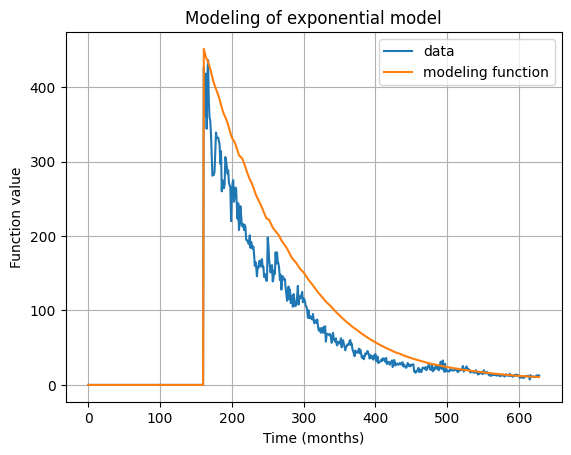

In [21]:
lista = []

for i in range(len(df2[0])):
    if i<161:
        lista.append(0)
    else:
        lista.append(integral_2(t = i, C_in=C_i, g=g, lamb=lamb))

plt.plot(df1[1])
print(len(df1[1]))
print(len(lista))
plt.plot(lista)
print(max(lista))
plt.title("Modeling of exponential model")
plt.xlabel("Time (months)")
plt.ylabel("Function value")
plt.legend(("data", "modeling function"))
plt.grid()

Lambda: 0.004684693028926367
629
629
(471.9086472382992+2660.1021002359985j)


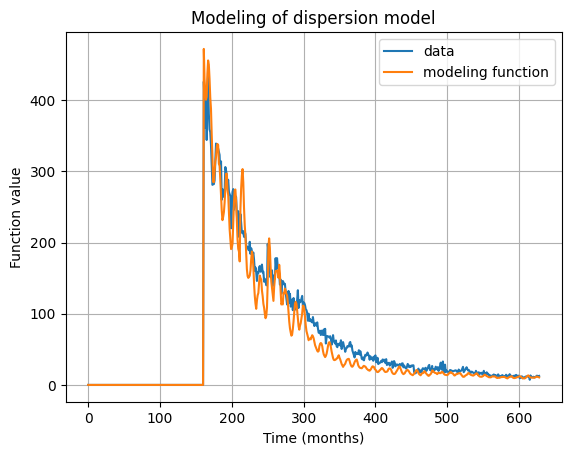

In [22]:
lamb = np.log(2)/(12.33 * 12) #years - half time of tritum decay
print(f"Lambda: {lamb}")

def g(x):

    #return piston_flow(x, t_t = 0)
    #return exp_model(x, t_t = 130)
    return disp_model(x, t_t=10, Pe=2)

def C_i(x):
    
    if x<0:
        return 0
    
    return df2[1][int(x)]

lista = []

for i in range(len(df2[0])):
    if i<161:
        lista.append(0)
    else:
        lista.append(integral_2(t = i, C_in=C_i, g=g, lamb=lamb, disp = True))

plt.plot(df1[1])
print(len(df1[1]))
print(len(lista))
plt.plot(lista)
print(max(lista))
plt.title("Modeling of dispersion model")
plt.xlabel("Time (months)")
plt.ylabel("Function value")
plt.legend(("data", "modeling function"))
plt.grid()

In [17]:
best = 0
minimal_mse = 1000000

mse_list = []

import torch as tc
from tqdm import tqdm

loss = tc.nn.MSELoss()

for p in range(1, 5):
    for t in tqdm(range(1, 50)):

        def g(x):

            #return piston_flow(x, t_t = 0)
            #return exp_model(x, t_t = t)
            return disp_model(x, t_t=t, Pe=p)

        lista = []
        
        for i in range(len(df2[0])):
            if i<161:
                lista.append(0)
            else:
                lista.append(integral_2(t = i, C_in=C_i, g=g, lamb=lamb, disp = True))

        lista = tc.tensor(lista)
        something = tc.tensor(df1[1])
        #print(lista)
        mse = loss(tc.real(lista), something).item()
        mse_list.append(mse)

        #print(mse)

        if mse<minimal_mse:
            minimal_mse = mse
            best = t

       
print(minimal_mse)
print(best)  

100%|██████████| 49/49 [00:58<00:00,  1.20s/it]

259.7219473958649
23


In [23]:
best = 0
minimal_mse = 1000000

mse_list = []

import torch as tc
from tqdm import tqdm

loss = tc.nn.MSELoss()

for t in tqdm(range(1, 400)):

    def g(x):

        #return piston_flow(x, t_t = 0)
        return exp_model(x, t_t = t)
        #return disp_model(x, t_t=40, Pe=2)

    lista = []
    
    for i in range(len(df2[0])):
        if i<161:
            lista.append(0)
        else:
            lista.append(integral_2(t = i, C_in=C_i, g=g, lamb=lamb))

    lista = tc.tensor(lista)
    something = tc.tensor(df1[1])

    mse = loss(lista, something).item()
    mse_list.append(mse)

    print(mse)

    if mse<minimal_mse:
        best = t

    # plt.plot(lista)
    # plt.plot(something)
    # break

print(minimal_mse)
print(best)  

 97%|█████████▋| 387/399 [05:58<00:11,  1.09it/s]

1769.549841840172


 97%|█████████▋| 388/399 [05:59<00:10,  1.08it/s]

1778.8439045342946


 97%|█████████▋| 389/399 [06:00<00:09,  1.08it/s]

1788.1394398627212


 98%|█████████▊| 390/399 [06:01<00:08,  1.08it/s]

1797.4362422946983


 98%|█████████▊| 391/399 [06:02<00:07,  1.08it/s]

1806.7341092280894


 98%|█████████▊| 392/399 [06:03<00:06,  1.08it/s]

1816.0328409502931


 98%|█████████▊| 393/399 [06:04<00:05,  1.08it/s]

1825.332240599714


 99%|█████████▊| 394/399 [06:05<00:04,  1.09it/s]

1834.6321141277706


 99%|█████████▉| 395/399 [06:06<00:03,  1.09it/s]

1843.9322702614306


 99%|█████████▉| 396/399 [06:07<00:02,  1.09it/s]

1853.2325204662714


 99%|█████████▉| 397/399 [06:08<00:01,  1.09it/s]

1862.5326789100618


100%|█████████▉| 398/399 [06:09<00:00,  1.09it/s]

1871.8325624268318


100%|██████████| 399/399 [06:10<00:00,  1.08it/s]

1881.1319904814663
1000000
399


445.0687700446822
8
564.6045734826478
210


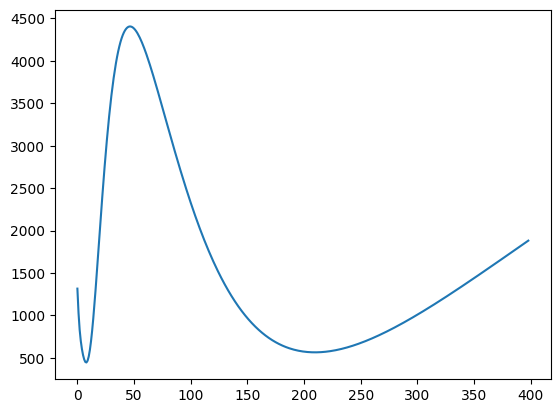

In [24]:
plt.plot(mse_list)
print(min(mse_list))
print(mse_list.index(min(mse_list)))
print(mse_list[210])
print(210)

Lambda: 0.004684693028926367
629
629
486.46183318841634


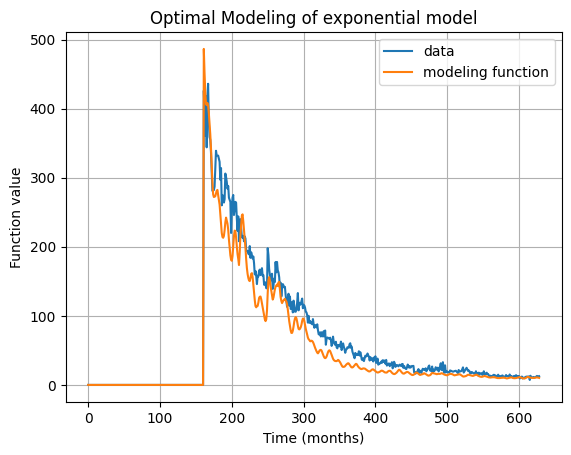

In [29]:
lamb = np.log(2)/(12.33 * 12) #years - half time of tritum decay
print(f"Lambda: {lamb}")

def g(x):

    #return piston_flow(x, t_t = 0)
    return exp_model(x, t_t = 8)
    #return disp_model(x, t_t=40, Pe=2)

def C_i(x):
    
    if x<0:
        return 0
    
    return df2[1][int(x)]

lista = []

for i in range(len(df2[0])):
    if i<161:
        lista.append(0)
    else:
        lista.append(integral_2(t = i, C_in=C_i, g=g, lamb=lamb))

plt.plot(df1[1])
print(len(df1[1]))
print(len(lista))
plt.plot(lista)
print(max(lista))
plt.title("Optimal Modeling of exponential model")
plt.xlabel("Time (months)")
plt.ylabel("Function value")
plt.legend(("data", "modeling function"))
plt.grid()



Lambda: 0.004684693028926367
629
629
316.35387952144026


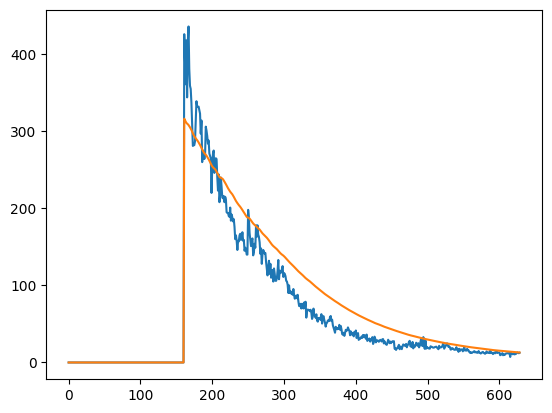

In [ ]:
lamb = np.log(2)/(12.33 * 12) #years - half time of tritum decay
print(f"Lambda: {lamb}")

def g(x):

    #return piston_flow(x, t_t = 0)
    return exp_model(x, t_t = 210)
    #return disp_model(x, t_t=40, Pe=2)

def C_i(x):
    
    if x<0:
        return 0
    
    return df2[1][int(x)]

lista = []

for i in range(len(df2[0])):
    if i<161:
        lista.append(0)
    else:
        lista.append(integral_2(t = i, C_in=C_i, g=g, lamb=lamb))

plt.plot(df1[1])
print(len(df1[1]))
print(len(lista))
plt.plot(lista)
print(max(lista))


Lambda: 0.004684693028926367
629
629
(707.8610303166341+59312623.64345783j)
tensor(1165.5553, dtype=torch.float64)


C:\Users\Jan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


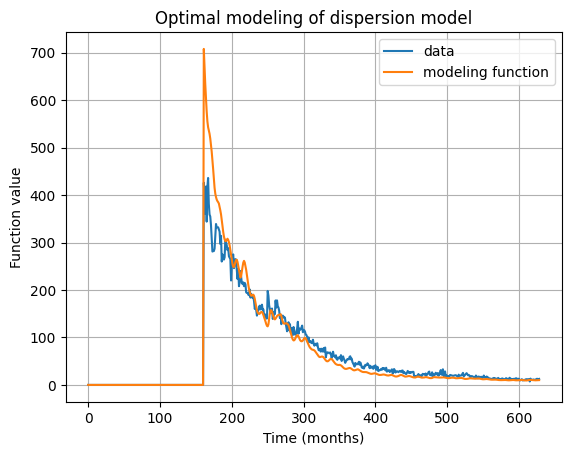

In [28]:
lamb = np.log(2)/(12.33 * 12) #years - half time of tritum decay
print(f"Lambda: {lamb}")

def g(x):

    #return piston_flow(x, t_t = 0)
    #return exp_model(x, t_t = 130)
    return disp_model(x, t_t=23, Pe=1)

def C_i(x):
    
    if x<0:
        return 0
    
    return df2[1][int(x)]

lista = []

for i in range(len(df2[0])):
    if i<161:
        lista.append(0)
    else:
        lista.append(integral_2(t = i, C_in=C_i, g=g, lamb=lamb, disp = True))

plt.plot(df1[1])
print(len(df1[1]))
print(len(lista))
plt.plot(lista)
print(max(lista))
plt.title("Optimal modeling of dispersion model")
plt.xlabel("Time (months)")
plt.ylabel("Function value")
plt.legend(("data", "modeling function"))
plt.grid()

loss = tc.nn.MSELoss()
print(loss(tc.real(tc.tensor(lista)), tc.tensor(df1[1])))